In [1]:
import os
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
print(os.listdir('/Users/shaoshilin/Desktop/flowers/flowers'))

['daisy', 'rose', 'tulip', 'dandelion', 'sunflower']


In [3]:
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder


In [5]:
from keras.preprocessing.image import ImageDataGenerator

# dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD, Adagrad, Adadelta, RMSprop
from keras.utils import to_categorical

Using TensorFlow backend.


In [6]:
from keras.layers import Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

import tensorflow as tf
import random as rn

import cv2
import numpy as np
from tqdm import tqdm
import os
from random import shuffle
from zipfile import ZipFile
from PIL import Image


In [7]:
X=[]
Z=[]
IMG_SIZE=150
FLOWER_DAISY_DIR="/Users/shaoshilin/Desktop/flowers/flowers/daisy/"
FLOWER_SUNFLOWER_DIR="/Users/shaoshilin/Desktop/flowers/flowers/sunflower/"
FLOWER_TULIP_DIR="/Users/shaoshilin/Desktop/flowers/flowers/tulip/"
FLOWER_DANDI_DIR="/Users/shaoshilin/Desktop/flowers/flowers/dandelion/"
FLOWER_ROSE_DIR="/Users/shaoshilin/Desktop/flowers/flowers/rose/"

In [8]:
def assign_label(img,flower_type):
    return flower_type


def make_train_data(flower_type, DIR):
    for img in tqdm(os.listdir(DIR)):
        label = assign_label(img, flower_type)
        path = os.path.join(DIR, img)
        #print(path)
        img = cv2.imread(path, cv2.IMREAD_COLOR)

        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

        X.append(np.array(img))
        Z.append(str(label))

make_train_data('Daisy',FLOWER_DAISY_DIR)
print(len(X))

make_train_data('Tulip',FLOWER_TULIP_DIR)
print(len(X))

make_train_data('Dandelion',FLOWER_DANDI_DIR)
print(len(X))

make_train_data('Rose',FLOWER_ROSE_DIR)
print(len(X))

make_train_data('Sunflower',FLOWER_SUNFLOWER_DIR)
print(len(X))




  4%|▍         | 43/984 [00:00<00:02, 423.33it/s]

765


  4%|▎         | 38/1052 [00:00<00:02, 375.79it/s]

1749


  6%|▌         | 45/784 [00:00<00:01, 442.38it/s]

2801


  5%|▍         | 34/734 [00:00<00:02, 335.49it/s]

3585


100%|██████████| 734/734 [00:01<00:00, 375.27it/s]

4319


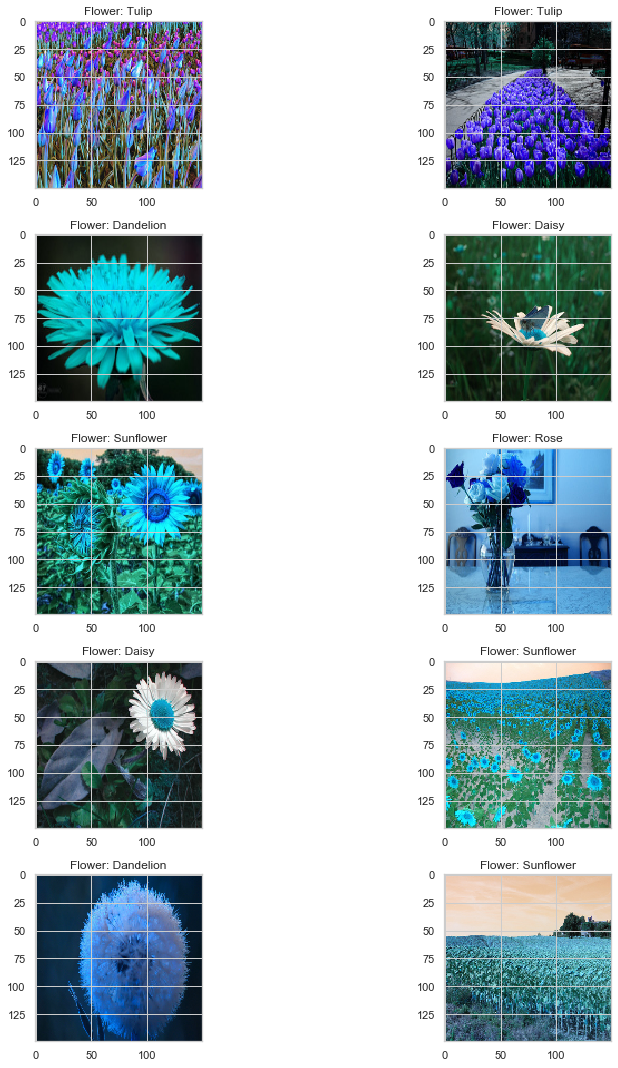

In [9]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+Z[l])
        
plt.tight_layout()

In [10]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)


In [11]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='Same', activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=96, kernel_size=(3, 3), padding='Same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=96, kernel_size=(3, 3), padding='Same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation="softmax"))

In [15]:
batch_size=128
epochs=50

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [16]:

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

In [17]:


model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 18, 18, 96)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 18, 18, 96)       

In [18]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)


Epoch 1/50
25/25 [==============================] - 50s 2s/step - loss: 1.5556 - accuracy: 0.3025 - val_loss: 1.3898 - val_accuracy: 0.3750
Epoch 2/50
25/25 [==============================] - 49s 2s/step - loss: 1.2850 - accuracy: 0.4519 - val_loss: 1.1471 - val_accuracy: 0.5167
Epoch 3/50
25/25 [==============================] - 53s 2s/step - loss: 1.1097 - accuracy: 0.5461 - val_loss: 1.0510 - val_accuracy: 0.5935
Epoch 4/50
25/25 [==============================] - 52s 2s/step - loss: 1.0777 - accuracy: 0.5702 - val_loss: 1.0212 - val_accuracy: 0.5750
Epoch 5/50
25/25 [==============================] - 54s 2s/step - loss: 0.9765 - accuracy: 0.6159 - val_loss: 0.9149 - val_accuracy: 0.6481
Epoch 6/50
25/25 [==============================] - 52s 2s/step - loss: 0.9322 - accuracy: 0.6324 - val_loss: 0.9110 - val_accuracy: 0.6528
Epoch 7/50
25/25 [==============================] - 54s 2s/step - loss: 0.9127 - accuracy: 0.6538 - val_loss: 0.8754 - val_accuracy: 0.6694
Epoch 8/50
25/25 [==

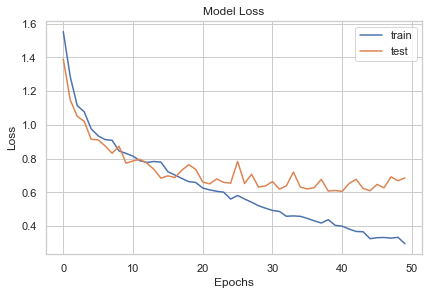

In [19]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [20]:
History.history


{'val_loss': [1.389750944243537,
  1.1470961411794027,
  1.0509596859967267,
  1.0212133646011352,
  0.9149279682724564,
  0.911025917088544,
  0.8754414518674215,
  0.8319683909416199,
  0.8735029370696457,
  0.7726913019462868,
  0.7864645423712554,
  0.7959296800472119,
  0.7728524230144642,
  0.7365286857993515,
  0.6843126729682639,
  0.6979947059242814,
  0.6882491562101576,
  0.7315138053011011,
  0.7642159011628893,
  0.7359389543533326,
  0.6614078746901618,
  0.6507135815090603,
  0.6799551654745031,
  0.6593702916745786,
  0.655085422374584,
  0.7835321814925582,
  0.6527515773419981,
  0.7077813258877507,
  0.6315302734021787,
  0.6384702263055024,
  0.6642853701556171,
  0.6190103115858855,
  0.6391536425661157,
  0.7205719731472157,
  0.6315686018378647,
  0.6202878607643976,
  0.6288017348006919,
  0.677197802066803,
  0.6080665937176457,
  0.6115443101635686,
  0.6060137417581346,
  0.6532113874400104,
  0.6775540457831488,
  0.6231583458405954,
  0.6101022742412708,
  

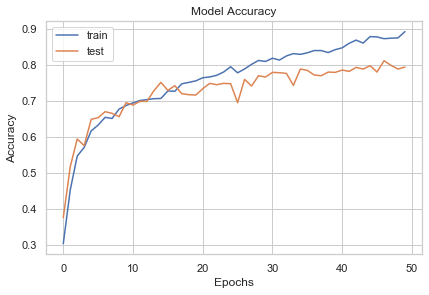

In [21]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [23]:
# getting predictions on val set.
pred=model.predict(x_test)
print(pred.shape)
pred_digits=np.argmax(pred,axis=1)
print(pred_digits.shape)

(1080, 5)
(1080,)


In [37]:
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

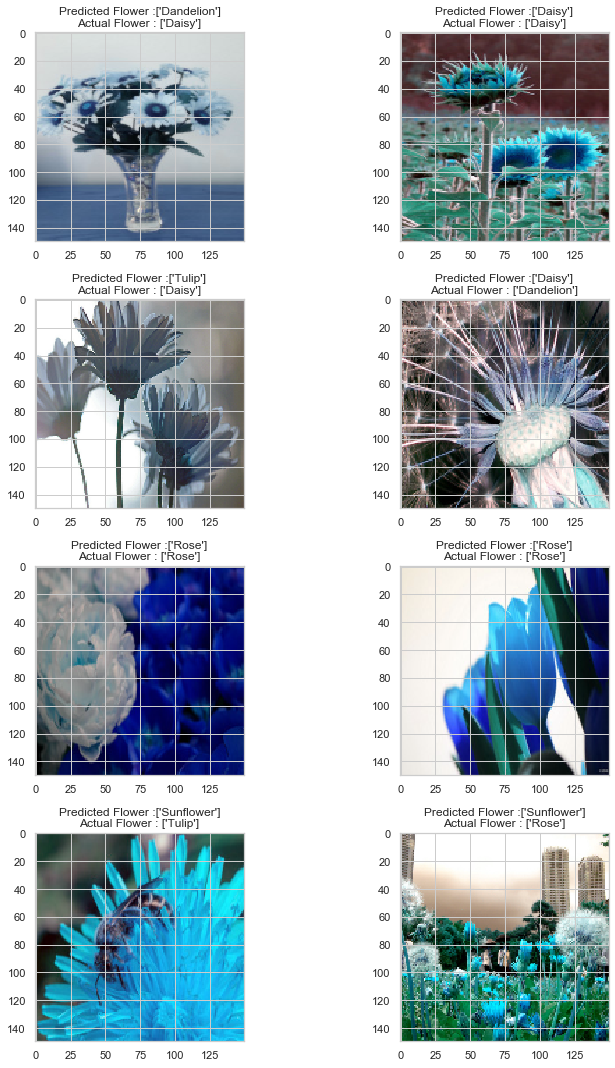

In [40]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[mis_class[count]])
        ax[i,j].set_title("Predicted Flower :"+str(le.inverse_transform([pred_digits[mis_class[count]]]))+"\n"+"Actual Flower : "+str(le.inverse_transform([np.argmax(y_test[prop_class[count]])])))
        plt.tight_layout()
        count+=1
